# The North Face ecommerce #

## Project ##

The marketing department would like to take advantage of machine learning solutions to boost online sales on the website : https://www.thenorthface.fr/

They have identified two major solutions that could have a huge effect on the conversion rates :

* Deploying a recommender system that will allow to suggest additionnal products to users, that are similar to the items they are already interested in. The recommendations could be materialized by a "you might also be interested by these products..." section that would appear on each product page of the website.

* Improving the structure of the products catalog thanks to topic extraction. The idea is to use unsupervised methods to challenge the existing categories : is it possible to find new categories of product that would be more suitable for the navigation on the website ?

# Import / Load DataSet ##

In [69]:
from google.colab import drive

DRIVE_PATH = '/content/drive'
drive.mount(DRIVE_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import os

MYDRIVE_PATH = os.path.join(DRIVE_PATH, 'MyDrive/')
PROJECT_DIR = os.path.join(MYDRIVE_PATH, 'dsfs-ft-31', 'TheNorthFace/')
DATA_DIR = os.path.join(PROJECT_DIR, 'data')

#os.chdir(PROJECT_DIR)

In [ ]:
#from google.colab import files
#uploaded = files.upload(DATA_DIR)

In [71]:
import pandas as pd
import numpy as np

DATA_FILE_PATH = os.path.join(DATA_DIR, 'sample-data.csv')
data_df = pd.read_csv(DATA_FILE_PATH, encoding='utf-8', sep=',')
data_df.head(5)

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [72]:
print(f'dataset shape : {data_df.shape}')

dataset shape : (500, 2)


In [73]:
def display_column(dtf:pd.DataFrame, col:str, nb_rows:int):
  for line in dtf.loc[:nb_rows-1, col]:
    print(line)


# Pre-Processing of textual data (description) #

### First remove Html tags ###

In [74]:
# First, remove html tags
from bs4 import BeautifulSoup

data_df['description_clean'] = data_df['description'].apply(lambda x: ' '.join(BeautifulSoup(x, "html.parser").stripped_strings))

In [75]:
display_column(data_df, 'description_clean', 3)

Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program. Details: "Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry" "Exposed, brushed elastic waistband for comfort" 5-panel construction with traditional boxer back "Inseam (size M) is 4 1/2""" Fabric: 3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program Weight: 99 g (3.5 oz) Made in Mexico.
Active sport boxer briefs - Skinning up Glory requires enough movement without

###<u> Remarks<u>###

It looks like text before first "-" character is the type / group of product. We can notice that each description share a common structure with sub-sections with same title. Does it help identifying topics ?
If yes, we can add typeofproduct to the begining of description (corresponds to group sub-section from start to first "-"). Testing the whole pipeline on this pre-processed description with additional section-title do not increase clustering quality

### Extract description summary at the bigining (in a column), it might help to describe clusters ###

In [76]:
# extract product group / type in a new column
print(data_df.shape)
data_df['group'] = data_df['description_clean'].apply(lambda x: x.split('-')[0])
data_df.head(5)

(500, 3)


,id,description,description_clean,group
0,1,Active classic boxers - There's a reason why o...,Active classic boxers - There's a reason why o...,Active classic boxers
1,2,Active sport boxer briefs - Skinning up Glory ...,Active sport boxer briefs - Skinning up Glory ...,Active sport boxer briefs
2,3,Active sport briefs - These superbreathable no...,Active sport briefs - These superbreathable no...,Active sport briefs
3,4,"Alpine guide pants - Skin in, climb ice, switc...","Alpine guide pants - Skin in, climb ice, switc...",Alpine guide pants
4,5,"Alpine wind jkt - On high ridges, steep ice an...","Alpine wind jkt - On high ridges, steep ice an...",Alpine wind jkt


In [77]:
display_column(data_df, 'description_clean', 3)

Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program. Details: "Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry" "Exposed, brushed elastic waistband for comfort" 5-panel construction with traditional boxer back "Inseam (size M) is 4 1/2""" Fabric: 3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program Weight: 99 g (3.5 oz) Made in Mexico.
Active sport boxer briefs - Skinning up Glory requires enough movement without

### Text preprocessing - keep only alphanumeric characters or simple space and lowerize characters ###

In [78]:

data_df['description_clean'] = data_df['description_clean'].apply(lambda x: ''.join(ch for ch in x if ch.isalnum() or ch==" "))
data_df['description_clean'] = data_df['description_clean'].fillna('').apply(lambda x: x.lower())

In [79]:
display_column(data_df, 'description_clean', 3)

active classic boxers  theres a reason why our boxers are a cult favorite  they keep their cool especially in sticky situations the quickdrying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers nexttoskin softness fivepanel construction with a traditional boxer back for a classic fit and a functional fly made of 37oz 100 recycled polyester with moisturewicking performance inseam size m is 4 12 recyclable through the common threads recycling program details silky capilene 1 fabric is ultralight breathable and quicktodry exposed brushed elastic waistband for comfort 5panel construction with traditional boxer back inseam size m is 4 12 fabric 37oz 100 allrecycled polyester with gladiodor natural odor control for the garment recyclable through the common threads recycling program weight 99 g 35 oz made in mexico
active sport boxer briefs  skinning up glory requires enough movement without your boxers deciding to poach their own route the form

### Text preprocessing - keep only lemmatized tokens skipping STOP_WORDS ###

In [80]:
# Importing english
import en_core_web_sm
nlp = en_core_web_sm.load()

from spacy.lang.en.stop_words import STOP_WORDS

data_df["description_tokenized"] = data_df["description_clean"].apply(lambda x: [token.lemma_ for token in nlp(x) if (token.text not in STOP_WORDS and token.text !=' ')])
display_column(data_df, 'description_tokenized', 3)

['active', 'classic', 'boxer', 's', 'reason', 'boxer', 'cult', 'favorite', 'cool', 'especially', 'sticky', 'situation', 'quickdrye', 'lightweight', 'underwear', 'take', 'minimal', 'space', 'travel', 'pack', 'expose', 'brush', 'waistband', 'offer', 'nexttoskin', 'softness', 'fivepanel', 'construction', 'traditional', 'boxer', 'classic', 'fit', 'functional', 'fly', '37', 'oz', '100', 'recycle', 'polyester', 'moisturewicking', 'performance', 'inseam', 'size', 'm', '4', '12', 'recyclable', 'common', 'thread', 'recycle', 'program', 'detail', 'silky', 'capilene', '1', 'fabric', 'ultralight', 'breathable', 'quicktodry', 'expose', 'brush', 'elastic', 'waistband', 'comfort', '5panel', 'construction', 'traditional', 'boxer', 'inseam', 'size', 'm', '4', '12', 'fabric', '37', 'oz', '100', 'allrecycle', 'polyester', 'gladiodor', 'natural', 'odor', 'control', 'garment', 'recyclable', 'common', 'thread', 'recycle', 'program', 'weight', '99', 'g', '35', 'oz', 'mexico']
['active', 'sport', 'boxer', 'br

In [81]:
data_df["description_clean"] = data_df['description_tokenized'].apply(lambda x: ' '.join(x))
data_df = data_df.drop(['description_tokenized' ], axis=1)
display_column(data_df, 'description_clean', 3)


active classic boxer s reason boxer cult favorite cool especially sticky situation quickdrye lightweight underwear take minimal space travel pack expose brush waistband offer nexttoskin softness fivepanel construction traditional boxer classic fit functional fly 37 oz 100 recycle polyester moisturewicking performance inseam size m 4 12 recyclable common thread recycle program detail silky capilene 1 fabric ultralight breathable quicktodry expose brush elastic waistband comfort 5panel construction traditional boxer inseam size m 4 12 fabric 37 oz 100 allrecycle polyester gladiodor natural odor control garment recyclable common thread recycle program weight 99 g 35 oz mexico
active sport boxer brief skin glory require movement boxer decide poach route formfitte active sport boxer brief breathable 93 polyester 71 recycle fabric s fastwicke dry quickly 7 spandex stretch seamless waistband soft leg edge will not roll bind gussete flatsewn 6 inseam size m offset prevent innerthigh chafe flyf

In [82]:
data_df.head(5)

,id,description,description_clean,group
0,1,Active classic boxers - There's a reason why o...,active classic boxer s reason boxer cult favor...,Active classic boxers
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer brief skin glory require mo...,Active sport boxer briefs
2,3,Active sport briefs - These superbreathable no...,active sport brief superbreathable nofly brief...,Active sport briefs
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pant skin climb ice switch rock t...,Alpine guide pants
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt high ridge steep ice alpine ja...,Alpine wind jkt


### Vectorize texts / lemmas computing Tfidf (Text frequency * Inverse document frequency) ###

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(data_df["description_clean"])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35126 stored elements and shape (500, 4674)>

In [85]:
print(type(X))
print(X.get_shape())
print(data_df.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(500, 4674)
(500, 4)


## Part 1 : Groups of products with similar descriptions ##
## Clusterize documents with DBScan, try to make 10-20 clusters with minimum outliers.
## Prior to DBScan, determine reasonable epsilon parameter (for DBScan) with K-nearest neighbors with cosine metric and 15 neighbors ###

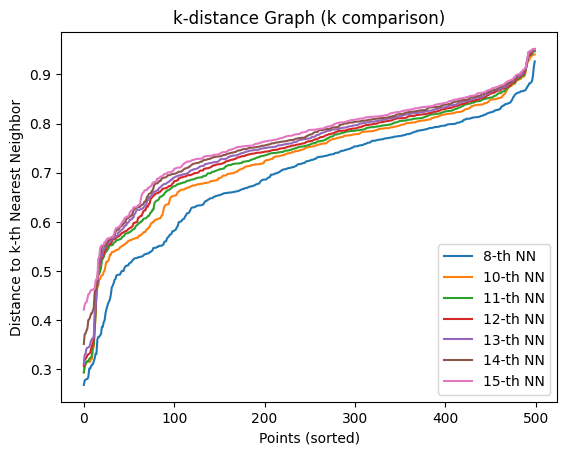

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

# X: [i,j] tdfid of token j in document i
#  k-NN to compute the k-th nearest distances (min_samples = 12 for DBSCAN)
N_NEIGHBORS = 30
knn = NearestNeighbors(n_neighbors=N_NEIGHBORS, metric='cosine')
knn.fit(X.toarray())
# Compute distances to the 2nd nearest neighbor
#distances, shape (X.shape[0], k) (number of doc in X, k)
# distances[i, j] = distance between document i and its j-th nearest neighbor
#indices, shape (X.shape[0],k)
#indices[i, j] = index of the j-th nearest neighbor of document i
distances, indices = knn.kneighbors(X.toarray())
for k in [8,10,11,12,13,14,15]:
    sorted_distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(sorted_distances, label=f"{k}-th NN")

plt.title("k-distance Graph (k comparison)")
plt.xlabel("Points (sorted)")
plt.ylabel("Distance to k-th Nearest Neighbor")
plt.legend()
plt.show()

In [87]:
np.linspace(0.60, 0.65, 15)

array([0.6       , 0.60357143, 0.60714286, 0.61071429, 0.61428571,
       0.61785714, 0.62142857, 0.625     , 0.62857143, 0.63214286,
       0.63571429, 0.63928571, 0.64285714, 0.64642857, 0.65      ])

 looks like the elbow is between 0.8 and 0.9 for each curves


## Train DBSCAN for different couples of (eps_min sample).

Compute different metrics / values for each

- number of clusters
- cluster density (intra cluster consistency)
- outliers prop
- silhouette score (how much cluster differ)


In [88]:
from sklearn.metrics import pairwise_distances

def cluster_density(X, labels, metric='cosine',min_size=2):
    if hasattr(X, "toarray"):
        X = X.toarray()
    densities = []
    unique_labels = [l for l in np.unique(labels) if l != -1]
    for label in unique_labels:
        if label == -1:
            continue
        cluster_points = X[labels == label]
        if len(cluster_points) < min_size:
            continue
        try:
          dist = pairwise_distances(cluster_points, metric=metric)
          densities.append(1 - np.mean(dist))
        except Exception:
          continue
    return np.mean(densities) if len(densities) > 0 else np.nan

In [89]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score

eps_list = [0.3,0.4,0.7,0.71,0.72,0.73,0.74,0.745,0.75,0.752, 0.78]
eps_list = np.linspace(0.74,0.94,40)
eps_list = np.linspace(0.60,0.95,40)
# min_samples : minimum sample size to create a cluster if possible
min_samples = [5,8,10,20,25]

#dbscan_param_dtf = pd.DataFrame(columns=['eps', 'min_samples', 'cluster_size', 'clusters', 'outliers_prop', 'silhouette_score'])
dbscan_param_dtf = pd.DataFrame(columns=['eps', 'min_samples', 'cluster_size', 'density_score', 'outliers_prop', 'silhouette_score'])
i=0
for _eps in eps_list:
  for _min_sample in min_samples:
    i = i+1
    #print('0 - len(dbscan_param_dtf) : ', len(dbscan_param_dtf))
    dbscan = DBSCAN(eps=_eps, min_samples=_min_sample, metric='cosine')  # Adjust eps and min_samples based on your data
    #labels : list of clusters (0, 1, 2, …, -1).
    labels = dbscan.fit_predict(X)
    #print(type(labels))
    labels_values_list = np.unique(labels).tolist()
    n_clusters = len(set(labels))
    outliers_count = np.sum(labels == -1)
    mask = labels != -1
    sil_score = np.nan
    density_score = np.nan
    if n_clusters >= 2:
          mask = labels != -1
          try:
              sil_score = silhouette_score(X[mask], labels[mask], metric='cosine')
              density_score = cluster_density(X[mask], labels[mask], metric='cosine')
          except Exception as e:
              pass
    dbscan_param_dtf.loc[len(dbscan_param_dtf)] = {'eps': _eps, 'min_samples': _min_sample, 'cluster_size': n_clusters, 'density_score': density_score, 'outliers_prop': outliers_count/X.shape[0], 'silhouette_score':sil_score}

dbscan_param_dtf = dbscan_param_dtf[dbscan_param_dtf['cluster_size'].between(12,17)]
dbscan_param_dtf.sort_values(by=['cluster_size','outliers_prop', 'silhouette_score', ], ascending=[False, True,False]).head(20)

,eps,min_samples,cluster_size,density_score,outliers_prop,silhouette_score
75,0.734615,5,15,0.430092,0.114,0.134301
70,0.725641,5,15,0.434552,0.164,0.151847
36,0.662821,8,14,0.460694,0.502,0.271724
80,0.743590,5,13,0.420184,0.090,0.131189
31,0.653846,8,13,0.471273,0.558,0.298883
26,0.644872,8,13,0.490257,0.588,0.315593
85,0.752564,5,12,0.457326,0.068,0.094908
76,0.734615,8,12,0.349105,0.242,0.154888
51,0.689744,8,12,0.437819,0.452,0.235783
41,0.671795,8,12,0.446584,0.492,0.256449


## Let's choose eps=0.734615 and min_samples = 5 for DBSCAN (outliers_prop < 20%) and relatively good density_score, moderate silhouette_score ##

### Train DBSCAN ###

In [90]:
dbscan = DBSCAN(eps=0.734615, min_samples=5, metric='cosine', )
dbscan.fit(X)

labels_values_list = np.unique(dbscan.labels_).tolist()
labels_values_list
labels = dbscan.labels_
data_df["cluster"] = labels

**Articles breakdown by cluster**

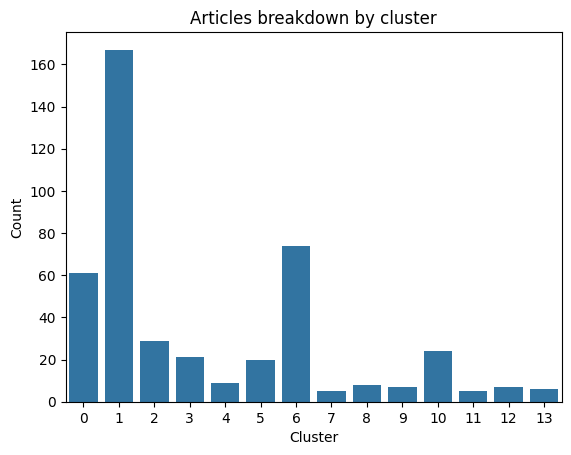

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="cluster", data=data_df[data_df["cluster"] != -1])
plt.title("Articles breakdown by cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


### Display most caracteristic words (top-5) along with samples inside each cluster ###

In [94]:
import pandas as pd
import numpy as np

# === 1. Création du DataFrame TF-IDF + Cluster (comme tu l’avais)
tfidf_df = pd.DataFrame(X.toarray(),
                        columns=vectorizer.get_feature_names_out(),
                        index=data_df.index)
tfidf_df['Cluster'] = labels

# average weight by cluster
cluster_means = tfidf_df.groupby('Cluster').mean()

# Compute word relative importance by cluster rather than most frequent in cluster
overall_mean = tfidf_df.drop(columns='Cluster').mean()
relative_importance = cluster_means.div(overall_mean, axis=1)

cluster_word_counts = {}
samples_dict = {}
report = []

for cluster in sorted(tfidf_df['Cluster'].unique()):
    cluster_data = tfidf_df[tfidf_df['Cluster'] == cluster]

    # Top 10 words (discriminating)
    top_caracteristic_words = relative_importance.loc[cluster].nlargest(5)
    cluster_word_counts[cluster] = top_caracteristic_words

    # Sample
    if len(cluster_data) >= 2:
        sample_idx = cluster_data.sample(n=2, random_state=42).index
    else:
        sample_idx = cluster_data.index
    samples = data_df.loc[sample_idx, 'description_clean'].tolist()
    samples_dict[cluster] = samples
    report.append({
        "Cluster": cluster,
        "Nb_docs": len(cluster_data),
        "Top_caracteristic_words": ", ".join(top_caracteristic_words.index),
        "Samples": "\n---\n".join(samples)
    })

cluster_report_df = pd.DataFrame(report)
#display(cluster_report_df.head())

for _, row in cluster_report_df.iterrows():
    print(f"\n=== Cluster {row['Cluster']} ({row['Nb_docs']} docs) ===")
    print("Top words :", row['Top_caracteristic_words'])
    print("Exemples :")
    print(row['Samples'])
    print("\n" + "-"*60 + "\n")



=== Cluster -1 (57 docs) ===
Top words : 06, 08, 09, 125, 1298
Exemples :
active sport brief superbreathable nofly brief minimalist choice highoctane endeavor blend fastwicke quickdrye 93 polyester 71 recycle 7 spandex stretchmesh support open mesh cool airflow soft edging leg opening seamless waist will not roll create friction layer smooth panel opacity recyclable common thread recycle program detail stretch mesh provide support openweave mesh airflow wick efficiently dry fast seamless construction leg opening halfinch selfbinde comfort flyfree support fabric 46 oz 93 polyester 71 recycled7 spandex moisturewicking performance recyclable common thread recycle program weight 49 g 17 oz israel
---
light variable surf trunk light lean surf trunk build minimal underwater drag diving bodysurfing pack tiny stuff pouch hardy ultralightweight 35 oz 50denier 100 polyester ripstop light variable feature flatlying 2button gussete fly stealth hip zip pocket inseam size 32 85 outseam 19 stuff pou

### Display most frequent words with WordCloud ###

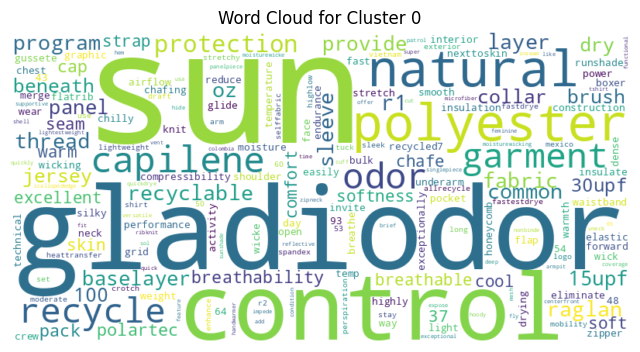

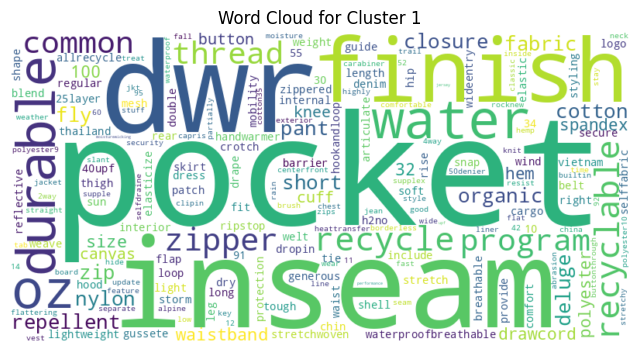

In [95]:
from wordcloud import WordCloud

labels = dbscan.labels_
# Create a DataFrame with the TF-IDF features for each word (columns) and the corresponding cluster labels -
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['Cluster'] = labels
# Generate Word Clouds for 2 Cluster
for cluster in list(set(labels))[:2]:
    if cluster == -1:
        continue
    #Filter tfidf_df rows that belong to the current cluster
    cluster_data = tfidf_df[tfidf_df['Cluster'] == cluster]

    # for each word in the cluster Sum TF-IDF values for all doc
    # sum axis = 0 -> Serie indexed by columns (=words/lemna)
    cluster_tfidf = cluster_data.drop(columns=['Cluster']).sum(axis=0)

    # Create a dictionary with words as keys and TF-IDF values
    word_freq = cluster_tfidf.to_dict()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()
    print()

# Part 2 - Recommender system #

### find_similar_items ###

### First create tfidf_df dataframe ###

In [96]:
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['Cluster'] = dbscan.labels_
tfidf_df['Id'] = data_df['id']

In [97]:
tfidf_df['Cluster'].head(5)

,Cluster
0,0
1,0
2,-1
3,1
4,1


In [98]:
def find_similar_items(item_id:int, nb_similar_item:int=2) -> list:
  # filter tfidf_df by item_id and lookup cluster
  cluster_predict = tfidf_df.loc[tfidf_df['Id'] == item_id, 'Cluster'].iloc[0].item()
  cluster_rows = tfidf_df[(tfidf_df['Cluster'] == cluster_predict) & (tfidf_df['Id'] !=item_id)]
  cluster_rows = cluster_rows.iloc[:nb_similar_item, -1]
  return cluster_rows.tolist()

In [59]:
# Test
find_similar_items(499,5)

[4, 5, 6, 9, 10]

Use python's input() function to allow the user to choose a product and perform some suggestions of similar items

In [100]:

import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from IPython.core.display import HTML

# List of all (group,id) to be used as input drop down
id_product_tuple_list = list(data_df.loc[:,['group', 'id']].itertuples(index=False, name=None))
dropdown = widgets.Dropdown(
    options=id_product_tuple_list,
    description='Select Product:',
    disabled=False

)

# Define a function to handle user input when a selection is made
def handle_dropdown_change(change):
    chosen_product = change.new
    description = [data_df.loc[data_df['id']==chosen_product,'description']][0]
    suggestions = data_df[data_df.id.isin(find_similar_items(int(chosen_product)))].iloc[:,1]
    print(f"Here is the suggestions for {description}:")
    print()
    for product in suggestions.tolist():
      display(HTML(product))
      print('-'*100)

# add eventhandler (handler function) to the dropdown widget
dropdown.observe(handle_dropdown_change, names='value')

display(dropdown)

Dropdown(description='Select Product:', options=(('Active classic boxers ', 1), ('Active sport boxer briefs ',…

Here is the suggestions for 16    Bucket hat - Besides its shade-casting prowess...
Name: description, dtype: object:



----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


# Part 3 : Topic modeling #

### The aim is to use an LSA model to automatically extract latent topics in the products' descriptions. ###

In [101]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix

In [102]:
# SVD represent documents and terms in vectors
N_COMPONENTS = 12
svd_model = TruncatedSVD(n_components=N_COMPONENTS, algorithm='randomized', n_iter=100)
lsa = svd_model.fit_transform(X)

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_{}".format(i+1) for i in range(N_COMPONENTS)], index = data_df.index)
topic_encoded_df["text"] = data_df['description_clean'].values
print(f' len topic_encoded_df : {topic_encoded_df.shape[0]}')
topic_encoded_df.head(5)


 len topic_encoded_df : 500


,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,text
0,0.255919,-0.048443,0.151349,0.114991,-0.112199,-0.049933,-0.040139,-0.081821,-0.080157,-0.053795,0.019781,-0.002036,active classic boxer s reason boxer cult favor...
1,0.224492,-0.065612,0.082428,0.100721,-0.024889,0.056235,-0.039831,-0.055472,-0.021763,-0.056197,0.052380,-0.165690,active sport boxer brief skin glory require mo...
2,0.211871,-0.068754,0.095238,0.050475,-0.030163,0.112329,-0.018727,0.035711,-0.018624,-0.042137,0.008194,-0.197875,active sport brief superbreathable nofly brief...
3,0.312059,-0.226493,-0.084600,-0.090093,0.012096,-0.027496,-0.005492,-0.112146,0.001121,-0.040340,0.159549,-0.056418,alpine guide pant skin climb ice switch rock t...
4,0.350547,-0.259257,-0.011843,-0.226018,-0.044230,-0.005204,0.066860,-0.014760,0.068846,0.033382,0.159750,-0.020649,alpine wind jkt high ridge steep ice alpine ja...


### <u>SVD vectors explain 21% of total variance<u> ###


In [103]:
svd_model.explained_variance_ratio_.sum()

np.float64(0.21038558595674342)

In [104]:
#main topic of each documents
topic_encoded_df["class_pred"] = [np.argmax(topic)+1 for topic in lsa]
topic_encoded_df.head(5)
topic_encoded_df[topic_encoded_df["class_pred"]==2].head(5)
#lsa.shape

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,text,class_pred
25,0.397254,0.515521,-0.034686,-0.169805,0.021672,-0.009401,-0.063435,-0.077696,0.002828,-0.056877,0.024819,-0.006012,city sea tshirt illustrate renaissance seainsp...,2
35,0.351624,0.467133,-0.037815,-0.163150,0.031567,0.005173,-0.055740,-0.063646,0.001113,-0.036624,0.028613,-0.013318,dragoon tshirt dragoon drop weapon favor big w...,2
40,0.365180,0.479660,-0.039527,-0.150831,0.026597,-0.007658,-0.059986,-0.056180,-0.015913,-0.025935,0.017837,0.002832,fish frenzy tshirt dependent freeflowe current...,2
55,0.382286,0.500773,-0.039062,-0.163679,0.011197,0.015274,-0.051020,-0.063489,-0.009565,-0.022149,0.037763,-0.006430,iceberg tshirt effect global warming run deep ...,2
57,0.376347,0.407393,-0.032664,-0.047820,0.021616,-0.004775,0.071065,-0.012851,0.018231,0.042549,-0.063164,-0.012567,73 logo tshirt softweare ringspun organic cott...,2


### Top-10 words for each topic (in term of weight in the topic) ###

First, create topic_dtf and visualise a sample

In [105]:
# svd_model.components_
#   each row : a latent topic
#   each column : the weight of a particular term in the corresponding latent topic
#   shape = (N_COMPONENTS,4674)
print(f'shape of svd_model.components_ : {svd_model.components_.shape}')
# svd_model.components_ : column j = (coordinates of token j in topic i )
topic_dtf =pd.DataFrame(svd_model.components_, index = ["topic_{}".format(i+1) for i in range(N_COMPONENTS)])
topic_dtf.columns = vectorizer.get_feature_names_out()
topic_dtf_t = topic_dtf.T
topic_dtf_t.iloc[1000:1002,:]


shape of svd_model.components_ : (12, 4674)


,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12
clear,0.005116,-0.002317,-0.000826,-0.005094,-0.003349,0.001433,-0.000556,-0.000708,-0.001990,0.017408,0.009171,-0.006046
clearance,0.000831,-0.001352,-0.000801,-0.002841,0.000533,0.001181,-0.007480,0.008085,-0.002364,-0.002195,-0.002542,0.000168


Display most caracteristic words for each topic

In [66]:
import itertools

topic_word_freq = dict()
TOP_N_WORDS = 10
TOP_N_TOPICS_TO_PRINT = 3
for i in range(N_COMPONENTS):
    col_name = 'topic_'+ str(i+1)
    #index = token ,  value = coord word in topic
    top_n = topic_dtf_t[col_name].nlargest(TOP_N_WORDS)
    topic_word_freq[col_name]=top_n.to_dict()

for topic, words_weight in itertools.islice(topic_word_freq.items(), TOP_N_TOPICS_TO_PRINT):
    print(f"Topic {topic}:")
    print()
    for word, weight in words_weight.items():
      print(word + ": " + "{:.3f}".format(weight))
    print("\n" + "-"*40 + "\n")

Topic topic_1:

pocket: 0.202
organic: 0.195
oz: 0.187
recycle: 0.187
recyclable: 0.175
cotton: 0.173
common: 0.171
program: 0.171
thread: 0.171
100: 0.144

----------------------------------------

Topic topic_2:

organic: 0.230
ringspun: 0.227
phthalatefree: 0.221
pvc: 0.220
cotton: 0.219
tape: 0.218
ink: 0.214
tshirt: 0.214
shoulder: 0.146
yarn: 0.145

----------------------------------------

Topic topic_3:

merino: 0.307
odor: 0.233
control: 0.174
wool: 0.151
gladiodor: 0.144
natural: 0.136
capilene: 0.136
garment: 0.125
softness: 0.117
layer: 0.116

----------------------------------------



### WordCloud for each topic (in term of weight in the topic) ###

Topic topic_12:



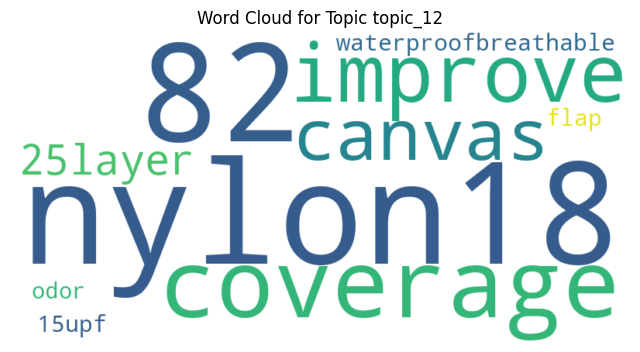

In [106]:

import itertools

topic_word_freq = dict()
TOP_N_TOPICS_TO_PRINT = 2
TOP_N_WORDS = 10
for i in range(N_COMPONENTS):
    top_n = topic_dtf_t[col_name].nlargest(TOP_N_WORDS)
    topic_word_freq[col_name]=top_n.to_dict()

for topic, words_weight in itertools.islice(topic_word_freq.items(), TOP_N_TOPICS_TO_PRINT):
    print(f"Topic {topic}:")
    print()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_weight)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for Topic {topic}")
    plt.axis("off")
    plt.show()

### Mapping cluster - Topics ###

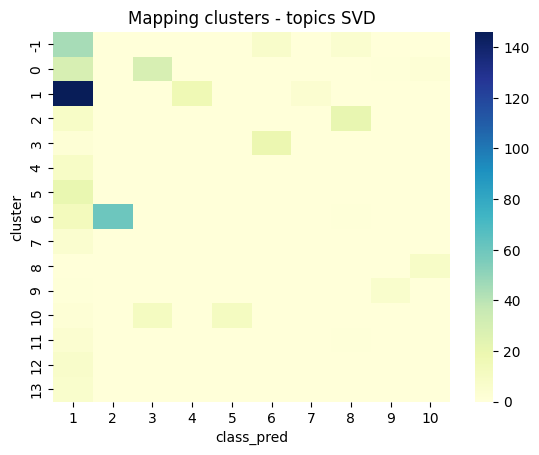

In [107]:
sns.heatmap(pd.crosstab(data_df["cluster"], topic_encoded_df["class_pred"]), cmap="YlGnBu")
plt.title("Mapping clusters - topics SVD")
plt.show()

## (OPTIONAL) *NLP* on description's group ##

In [ ]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
GROUPS = vectorizer.fit_transform(data_df["group"])
GROUPS

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1134 stored elements and shape (500, 372)>

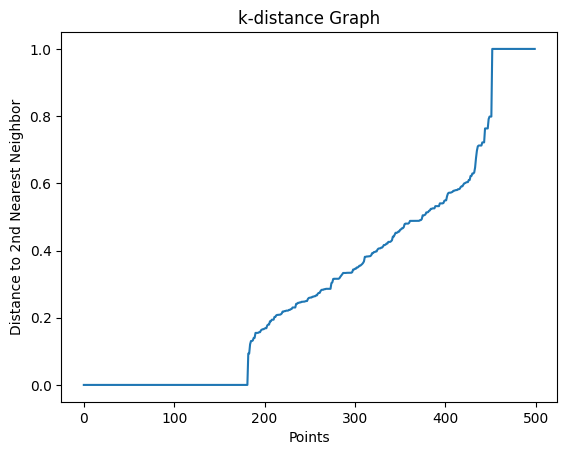

In [ ]:
# Step 2: Use k-NN to compute the k-th nearest distances (min_samples = 10 for DBSCAN)
knn = NearestNeighbors(n_neighbors=40, metric='cosine')
knn.fit(GROUPS.toarray())

# Step 3: Compute distances to the 2nd nearest neighbor
distances, indices = knn.kneighbors(GROUPS.toarray())

# Step 4: Sort distances in ascending order
sorted_distances = np.sort(distances[:, 1], axis=0)  # Distances to the 2nd nearest neighbor
plt.plot(sorted_distances)
plt.title("k-distance Graph")
plt.xlabel("Points")
plt.ylabel("Distance to 2nd Nearest Neighbor")

plt.show()

In [ ]:
# Step 2: Apply DBSCAN for clustering
eps_list = np.linspace(0.60, 0.95, 40)
min_samples = [5,6,7,10,15,20]

#eps_list = [0.7]
#min_samples = [10]
dbscan_param_dtf = pd.DataFrame(columns=['eps', 'min_samples', 'cluster_size', 'clusters', 'outliers_prop', 'silhouette_score'])
i=0
for _eps in eps_list:
  for _min_sample in min_samples:
    i = i+1
    #print('0 - len(dbscan_param_dtf) : ', len(dbscan_param_dtf))
    dbscan = DBSCAN(eps=_eps, min_samples=_min_sample, metric='cosine')  # Adjust eps and min_samples based on your data
    labels = dbscan.fit_predict(GROUPS)
   #print(type(labels))
    labels_values_list = np.unique(labels).tolist()
    n_clusters = len(set(labels))
    outliers_count = np.sum(labels == -1)
    mask = labels != -1
    sil_score = np.nan
    if n_clusters >= 2:
          mask = labels != -1
          try:
              sil_score = silhouette_score(X[mask], labels[mask], metric='cosine')
          except Exception as e:
              sil_score = np.nan
    dbscan_param_dtf.loc[len(dbscan_param_dtf)] = {'eps': _eps, 'min_samples': _min_sample, 'cluster_size': n_clusters, 'clusters': labels_values_list, 'outliers_prop': outliers_count/X.shape[0], 'silhouette_score':sil_score}

dbscan_param_dtf = dbscan_param_dtf[dbscan_param_dtf['cluster_size'].between(12,17)]
dbscan_param_dtf.sort_values(by=['cluster_size','outliers_prop', 'silhouette_score', ], ascending=[False, True,False]).head(20)

,eps,min_samples,cluster_size,clusters,outliers_prop,silhouette_score
0,0.600000,5,15,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...",0.340,0.032049
12,0.617949,5,13,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0.322,0.023523
6,0.608974,5,13,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0.326,0.024260
1,0.600000,6,13,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0.388,0.034332
24,0.635897,5,12,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.308,0.019328
18,0.626923,5,12,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.320,0.020472
13,0.617949,6,12,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.368,0.028095
7,0.608974,6,12,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0.376,0.029066
